In [45]:
import os
import matplotlib.pyplot as plt
# print(os.listdir())
import pandas as pd
import numpy as np
import warnings
from mpl_toolkits.mplot3d import Axes3D

pd.options.display.float_format = '{:.2f}'.format


# from google.colab import files
# uploaded = files.upload()

In [46]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

In [47]:
mouse_data = pd.read_csv(mouse_drug_data_to_load)
mouse_clinic = pd.read_csv(clinical_trial_data_to_load)

In [48]:
mouse_combine2 = pd.merge(mouse_clinic, mouse_data, how='right', on='Mouse ID')

In [49]:
mouse_combine2.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.00,0,Capomulin
1,b128,5,45.65,0,Capomulin
2,b128,10,43.27,0,Capomulin
3,b128,15,43.78,0,Capomulin
4,b128,20,42.73,0,Capomulin
5,b128,25,43.26,1,Capomulin
6,b128,30,40.61,1,Capomulin
7,b128,35,37.97,1,Capomulin
8,b128,40,38.38,2,Capomulin
9,b128,45,38.98,2,Capomulin


In [55]:

mouse_combine3 = pd.DataFrame(mouse_combine2)
# list(mouse_combine3)


In [58]:
Mean_tumor_voldf= mouse_combine2.groupby(['Drug', 'Timepoint'], as_index=False).mean()
Mean_tumor_voldf = Mean_tumor_voldf.drop(columns=["Metastatic Sites"])
Mean_tumor_voldf = pd.DataFrame(Mean_tumor_voldf)
Mean_tumor_voldf.reset_index(col_level=str)

# Mean_tumor_voldf
# sem = [s.sem() for s in Mean_tumor_voldf]

#list(Mean_tumor_voldf)
# Mean_tumor_voldf.head(10)

# Mean_tumor_voldf.drop(Mean_tumor_voldf.columns[2], axis=1)
# df.groupby(['cluster','org']).mean()
# df.drop(columns=['B', 'C'])

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.00
1,Capomulin,5,44.27
2,Capomulin,10,43.08
3,Capomulin,15,42.06
4,Capomulin,20,40.72
5,Capomulin,25,39.94
6,Capomulin,30,38.77
7,Capomulin,35,37.82
8,Capomulin,40,36.96
9,Capomulin,45,36.24


In [60]:


STerror_tumor_voldf3= mouse_combine2.groupby(['Drug', 'Timepoint']).sem()

STerror_tumor_voldf3 = STerror_tumor_voldf3.drop(columns=["Metastatic Sites", "Mouse ID"])
# STerror_tumor_voldf3.reset_index(col_level=str)
list(STerror_tumor_voldf3)
STerror_tumor_voldf3 = pd.DataFrame(STerror_tumor_voldf3)
STerror_tumor_voldf3.head(10)


Mean_tumor_stder = pd.merge(Mean_tumor_voldf, STerror_tumor_voldf3, how='right', on='Drug')
Mean_tumor_stder.rename(columns={'Tumor Volume (mm3)_y' : 'Standard Err'}, inplace=True)
# Mean_tumor_stder = Mean_tumor_stder.drop(columns=["Tumor Volume (mm3)_x"])
# data.rename(columns={'gdp':'log(gdp)'}, inplace=True)
# Mean_tumor_stder.head(100)

In [62]:

Merge_df = Mean_tumor_stder.reset_index().pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)_x', aggfunc='mean')
Merge_df2 = Mean_tumor_stder.reset_index().pivot_table(index='Timepoint', columns='Drug', values='Standard Err')
# list(Merge_df2)
# Merge_df2.head(10)
# reset_index().pivot_table(values=3, index=[0, 1], columns=2, aggfunc='mean')

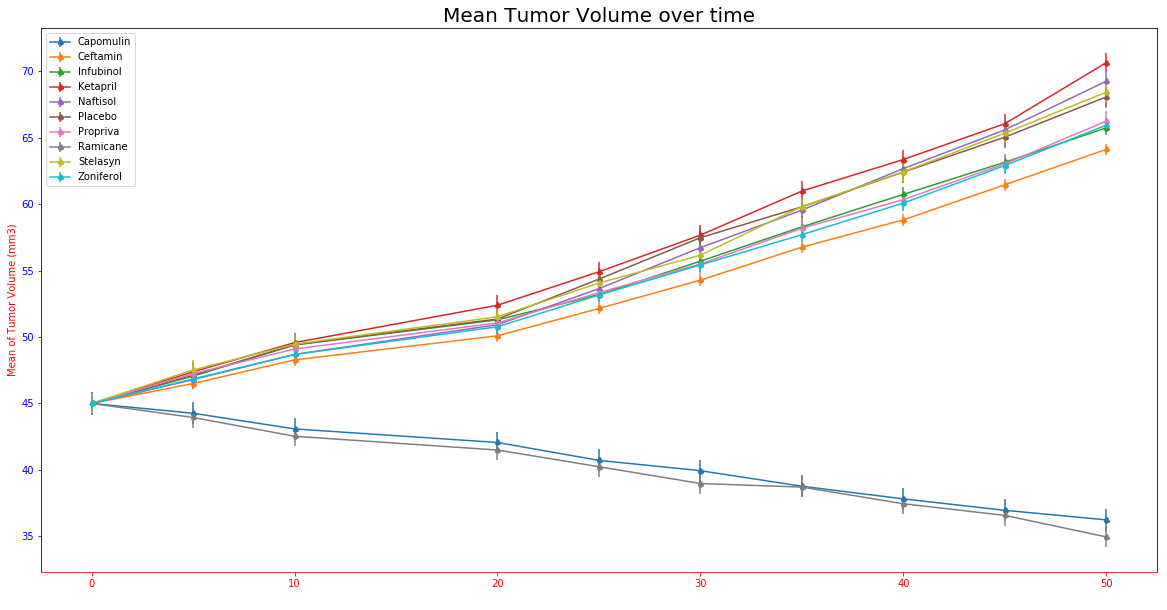

In [63]:
# Plot sample means with error bars
Xaxis= [0, 5, 10, 20, 25, 30, 35, 40, 45, 50]
# Yaxis = [45, 44.27,43.08,42.06,40.72,39.94, 38.77,37.82,36.96,36.24]
# Yerr = [.82,.82,.82,.82,.82,.82,.82,.82,.82,.82]

fig, ax = plt.subplots(figsize=(20, 10))
for drug in Merge_df.columns[0:]:
    ax.errorbar(Xaxis, Merge_df[drug], Merge_df2[drug], marker=r'$\clubsuit$', label=drug)

# ax.set_xlim(-0.5, len(Merge_df))

ax.set_xlabel("Time")
ax.set_ylabel("Mean of Tumor Volume (mm3)")
ax.spines['bottom'].set_color('red')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='blue')
plt.title('Mean Tumor Volume over time', fontsize=20)
plt.legend(loc='best')
plt.savefig('Fig1.png')
plt.show()

In [65]:
# Original merged plot
mouse_combine3 = pd.DataFrame(mouse_combine2)
list(mouse_combine3)
# Parse data by sites
Mean_tumor_sitedf= mouse_combine2.groupby(['Drug', 'Timepoint'], as_index=False).mean()
# Drop column Tumor Volume
Mean_tumor_sitedf = Mean_tumor_sitedf.drop(columns=["Tumor Volume (mm3)"])
Mean_tumor_sitedf = pd.DataFrame(Mean_tumor_sitedf)

# Reset index level
Mean_tumor_sitedf.reset_index(col_level=str)
Mean_tumor_sitedf.head(10)

# groupby and calculate standard error
STerror_tumor_sitedf3= mouse_combine2.groupby(['Drug', 'Timepoint']).sem()
STerror_tumor_sitedf3 = STerror_tumor_sitedf3.drop(columns=["Tumor Volume (mm3)", "Mouse ID"])
STerror_tumor_sitedf3.rename(columns={'Metastatic Sites' : 'Standard Err'}, inplace=True)
# print(STerror_tumor_sitedf3)

# Put values into table for plotting
Merge_sitedf = Mean_tumor_sitedf.reset_index().pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites', aggfunc='mean')
Merge_sitedf2 = STerror_tumor_sitedf3.reset_index().pivot_table(index='Timepoint', columns='Drug', values='Standard Err')
# print(Merge_sitedf2)
# Mean_tumor_sitedf2= Mean_tumor_sitedf.groupby(['Drug']['Timepoint']).agg({'Metastatic Sites': "mean"})



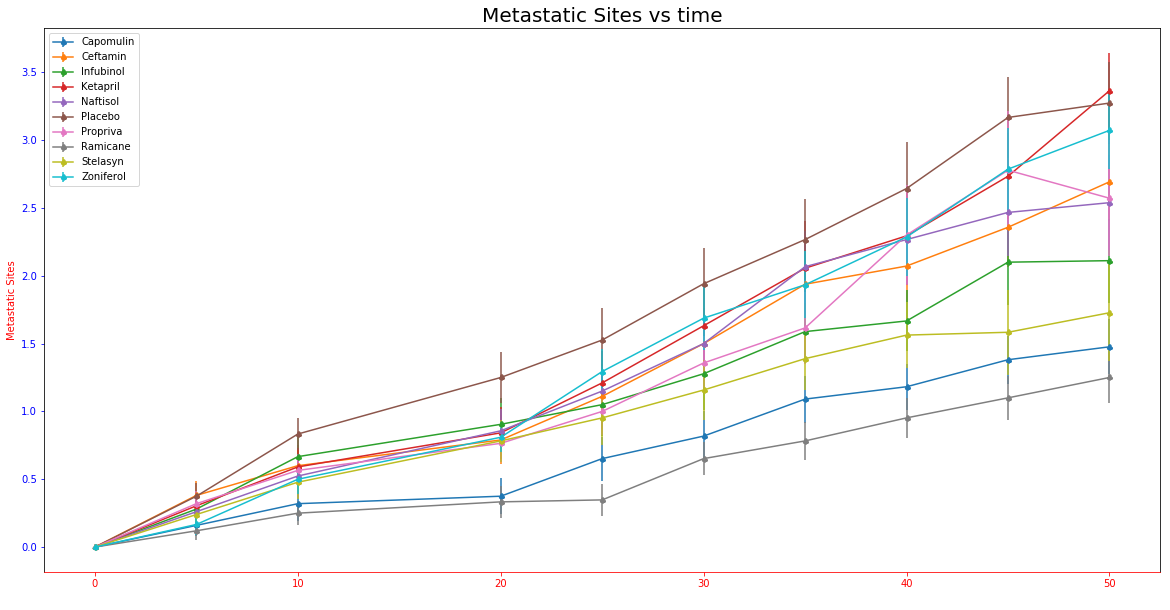

In [66]:
# Plot sample means with error bars
# Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

Xaxis= [0, 5, 10, 20, 25, 30, 35, 40, 45, 50]
# Yaxis = [45, 44.27,43.08,42.06,40.72,39.94, 38.77,37.82,36.96,36.24]
# Yerr = [.82,.82,.82,.82,.82,.82,.82,.82,.82,.82]

fig, ax = plt.subplots(figsize=(20, 10))
for drug in Merge_sitedf.columns[0:]:
    ax.errorbar(Xaxis, Merge_sitedf[drug], Merge_sitedf2[drug], marker=r'$\clubsuit$', label=drug)



ax.set_xlabel("Time")
ax.set_ylabel("Metastatic Sites")
ax.spines['bottom'].set_color('red')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='blue')
plt.title('Metastatic Sites vs time', fontsize=20)
plt.legend(loc='best')
plt.savefig('Fig2.png')
plt.show()



In [68]:
mouse_combine2.head(10)
# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
Xaxis= [0, 5, 10, 20, 25, 30, 35, 40, 45, 50]
# Original merged plot
mouse_combine3 = pd.DataFrame(mouse_combine2)
# list(mouse_combine3)
# Parse data by sites
Morbidity_micedf= mouse_combine3.groupby('Timepoint')['Mouse ID'].agg({'Mouse ID': "count"}).reset_index(drop=True)
#  new_group2 = new_group2.reset_index(drop=True)

# Morbidity_micedf.plot.scatter(Xaxis, Morbidity_micedf['Mouse ID'])
# Morbidity_micedf

C:\Users\lcc25\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


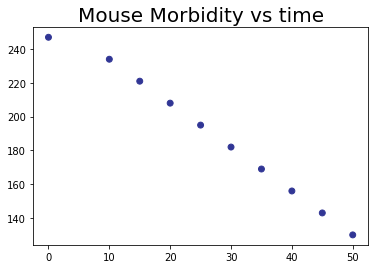

In [69]:
# plot scatter of morbidity
import matplotlib.pyplot as plt
# Plot sample means with error bars
# Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.

# Xaxis= [0, 5, 10, 20, 25, 30, 35, 40, 45, 50]
# Yaxis = [45, 44.27,43.08,42.06,40.72,39.94, 38.77,37.82,36.96,36.24]
# Yerr = [.82,.82,.82,.82,.82,.82,.82,.82,.82,.82]

# fig, ax = plt.subplots(figsize=(20, 10))
#for drug in Merge_sitedf.columns[0:]:
#    ax.errorbar(Xaxis, Merge_sitedf[drug], Merge_sitedf2[drug], marker=r'$\clubsuit$', label=drug)
cm = plt.cm.get_cmap('RdYlBu')
xy = [50, 45, 40, 35, 30, 25, 20, 15, 10, 0]
xy2 = np.arange(130, 260, 13)
ax.set_ylim([125,260])
z = Morbidity_micedf['Mouse ID']
sc = plt.scatter(xy,xy2, c=z, vmin=0, vmax=20, s=35, cmap=cm)
# ax = fig.add_sublot(111)


# ax.scatter(x=Morbidity_micedf[:,2], y=Morbidity_micedf[:,1], label='Data')

# ax.scatter([Xaxis, Mouse ID])

ax.set_xlabel("Time")
ax.set_ylabel("Mouse")
ax.spines['bottom'].set_color('red')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='blue')
plt.title('Mouse Morbidity vs time', fontsize=20)

plt.savefig('Fig4.png')
plt.show()

In [70]:
mouse_combine3 = pd.DataFrame(mouse_combine2)
list(mouse_combine3)
Bar_graphdf = pd.DataFrame(mouse_combine3)
# Bar_graphdf['Min', 'Max'] = Bar_graphdf.groupby('Drug')['Tumor Volume (mm3)'].agg(['min','max'])
first_lastdf = Bar_graphdf.sort_values('Drug').groupby('Drug')['Tumor Volume (mm3)'].agg(['first','last'])
first_lastdf
first_lastdf['Difference'] = first_lastdf['last'] - first_lastdf['first']
first_lastdf['Percent Vol Change'] = ((first_lastdf['Difference']/first_lastdf['first']) * 100)
# first_lastdf
# list(first_lastdf)

Drug
Capomulin   -13.37
Ceftamin     19.86
Infubinol     0.00
Ketapril     19.11
Naftisol      0.00
Placebo      27.98
Propriva     -6.89
Ramicane      7.16
Stelasyn      7.09
Zoniferol   -13.99
Name: Percent Vol Change, dtype: float64


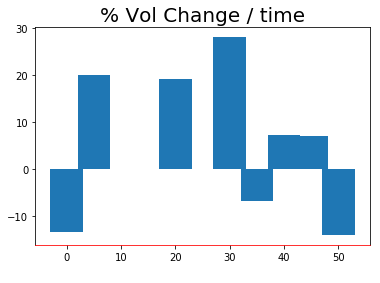

In [72]:
Z = first_lastdf['Percent Vol Change']
print(Z)
Xaxis = [0, 5, 10, 20, 25, 30, 35, 40, 45, 50]
# Labels = ['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol']
fig = plt.figure()
ax = plt.subplot()
ax.bar(Xaxis,Z, width=6)

ax.set_xlabel("Drug")
# ax.set_ylabel("Percent Vol Change")
ax.spines['bottom'].set_color('red')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('red')

plt.title('% Vol Change / time', fontsize=20)
# plt.legend(loc='best')
plt.savefig('Fig5.png')
plt.show()